**python 타겟팅_웹크롤링 및 전처리 워드클라우드, 연관분석 (c)cherryuki (ji)**

# Project (2021-04-01~2021-04-07)
## 01. 자료수집
### 1) 뉴스 기사 웹크롤링('대체식품', '대체육' 타겟팅)
- 식음료신문
- 농수축산식품(식품, 이슈플러스)
- 식품외식경제
- 식품저널뉴스

In [1]:
#식음료신문: http://www.thinkfood.co.kr/news/articleList.html?page=2&total=3642&sc_section_code=&sc_sub_section_code=&sc_serial_code=&sc_area=A&sc_level=&sc_article_type=&sc_view_level=&sc_sdate=&sc_edate=&sc_serial_number=&sc_word=%EB%8C%80%EC%B2%B4&sc_word2=&sc_andor=&sc_order_by=E&view_type=sm
#div.list-titles > a 기사링크
#기사제목: div.list-titles > a > strong 
#기사 페이지 기사 제목: div.article-head-title
#기사 내용: article.article-veiw-body
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
result_df = pd.DataFrame(None, columns = ['title', 'link', 'date', 'news'])
num=1
index=0
for num in range(1, 11):
    url = 'http://www.thinkfood.co.kr/news/articleList.html?page='+str(num)+'&total=158&sc_section_code=&sc_sub_section_code=&sc_serial_code=&sc_area=A&sc_level=&sc_article_type=&sc_view_level=&sc_sdate=&sc_edate=&sc_serial_number=&sc_word=대체식품&sc_word2=&sc_andor=&sc_order_by=E&view_type=sm'
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    link_list = soup.select('div.list-titles > a')
    link_list = ['http://www.thinkfood.co.kr'+link.attrs['href'] for link in link_list]
    date_list = soup.select('div.list-dated')
    date_list = [date.text for date in date_list]
    date_list = ' '.join(date_list)
    date_list = re.findall(r'\d{4}-\d{2}-\d{2}', date_list)
    title_list = soup.select('div.list-titles > a > strong')
    title_list = [title.text for title in title_list]
    for i in range(len(date_list)):
        html = requests.get(link_list[i])
        news_soup = BeautifulSoup(html.content, 'html.parser')
        news_list = news_soup.select('article.article-veiw-body')
        news_list = [news.text for news in news_list]
        result_df.loc[index] = [title_list[i], link_list[i], date_list[i], news_list]
        index+=1
    num+=1

In [2]:
#대체육
#http://www.thinkfood.co.kr/news/articleList.html?page=2&total=116&sc_section_code=&sc_sub_section_code=&sc_serial_code=&sc_area=A&sc_level=&sc_article_type=&sc_view_level=&sc_sdate=&sc_edate=&sc_serial_number=&sc_word=%EB%8C%80%EC%B2%B4%EC%9C%A1&sc_word2=&sc_andor=&sc_order_by=E&view_type=sm

result_df1 = pd.DataFrame(None, columns = ['title', 'link', 'date', 'news'])
num=1
index=0
for num in range(1, 8):
    url = 'http://www.thinkfood.co.kr/news/articleList.html?page='+str(num)+'&total=116&sc_section_code=&sc_sub_section_code=&sc_serial_code=&sc_area=A&sc_level=&sc_article_type=&sc_view_level=&sc_sdate=&sc_edate=&sc_serial_number=&sc_word=%EB%8C%80%EC%B2%B4%EC%9C%A1&sc_word2=&sc_andor=&sc_order_by=E&view_type=sm'
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    link_list = soup.select('div.list-titles > a')
    link_list = ['http://www.thinkfood.co.kr'+link.attrs['href'] for link in link_list]
    date_list = soup.select('div.list-dated')
    date_list = [date.text for date in date_list]
    date_list = ' '.join(date_list)
    date_list = re.findall(r'\d{4}-\d{2}-\d{2}', date_list)
    title_list = soup.select('div.list-titles > a > strong')
    title_list = [title.text for title in title_list]
    for i in range(len(date_list)):
        html = requests.get(link_list[i])
        news_soup = BeautifulSoup(html.content, 'html.parser')
        news_list = news_soup.select('article.article-veiw-body')
        news_list = [news.text for news in news_list]
        result_df1.loc[index] = [title_list[i], link_list[i], date_list[i], news_list]
        index+=1
    num+=1

In [3]:
result_df.to_csv('data/0_대체식품_식음료식문.csv', sep=',')

In [4]:
result_df1.to_csv('data/0_대체육_식음료식문.csv', sep=',')

In [5]:
#식품외식경제: http://www.foodbank.co.kr/news/articleList.html?page=1&total=40&sc_section_code=&sc_sub_section_code=&sc_serial_code=&sc_area=A&sc_level=&sc_article_type=&sc_view_level=&sc_sdate=&sc_edate=&sc_serial_number=&sc_word=%EB%8C%80%EC%B2%B4%EC%8B%9D%ED%92%88&sc_word2=&sc_andor=&sc_order_by=E&view_type=sm&sc_multi_code=
#기사제목: div.list-titles > a 텍스트
#기사 링크: div.list-titles > a href
#날짜: div.list-dated \d{4}-\d{2}-\d{2}
#기사 내용: #article-view-content-div
result_df2 = pd.DataFrame(None, columns = ['title', 'link', 'date', 'news'])
num=1
index=0
for num in range(1, 2):
    url = 'http://www.foodbank.co.kr/news/articleList.html?page='+str(num)+'&total=40&sc_section_code=&sc_sub_section_code=&sc_serial_code=&sc_area=A&sc_level=&sc_article_type=&sc_view_level=&sc_sdate=&sc_edate=&sc_serial_number=&sc_word=대체식품&sc_word2=&sc_andor=&sc_order_by=E&view_type=sm&sc_multi_code='
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    link_list = soup.select('div.list-titles > a')
    link_list = ['http://www.foodbank.co.kr'+link.attrs['href'] for link in link_list]
    date_list = soup.select('div.list-dated')
    date_list = [date.text for date in date_list]
    date_list = ' '.join(date_list)
    date_list = re.findall(r'\d{4}-\d{2}-\d{2}', date_list)
    title_list = soup.select('div.list-titles > a > strong')
    title_list = [title.text for title in title_list]
    for i in range(len(date_list)):
        html = requests.get(link_list[i])
        news_soup = BeautifulSoup(html.content, 'html.parser')
        news_list = news_soup.select('#article-view-content-div')
        news_list = [news.text for news in news_list]
        result_df2.loc[index] = [title_list[i], link_list[i], date_list[i], news_list]
        index+=1
    num+=1

In [6]:
result_df2.to_csv('data/0_대체식품_식품외식경제.csv', sep=',')

In [7]:
#대체육, 대체식품
#농수축산신문(식품): https://www.aflnews.co.kr/news/articleList.html?page=1&total=97&sc_section_code=&sc_sub_section_code=&sc_serial_code=&sc_area=A&sc_level=&sc_article_type=&sc_view_level=&sc_sdate=1999-05-20&sc_edate=2021-04-03&sc_serial_number=&sc_word=%EB%8C%80%EC%B2%B4%EC%8B%9D%ED%92%88&box_idxno=&sc_multi_code=&sc_is_image=&sc_is_movie=&sc_order_by=E&view_type=sm
#기사제목: h4.titles > a 텍스트
#기사 링크: h4.titles > a href
#기사 내용: #article-view-content-div
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
result_df3 = pd.DataFrame(None, columns = ['title', 'link', 'date', 'news'])
num=1
index=0
for num in range(1,4):
    url = 'https://www.aflnews.co.kr/news/articleList.html?page='+str(num)+'&total=97&sc_section_code=&sc_sub_section_code=&sc_serial_code=&sc_area=A&sc_level=&sc_article_type=&sc_view_level=&sc_sdate=1999-05-20&sc_edate=2021-04-03&sc_serial_number=&sc_word=%EB%8C%80%EC%B2%B4%EC%8B%9D%ED%92%88&box_idxno=&sc_multi_code=&sc_is_image=&sc_is_movie=&sc_order_by=E&view_type=sm'
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    link_list = soup.select('h4.titles > a')
    link_list = ['http://www.aflnews.co.kr'+link.attrs['href'] for link in link_list]
    title_list = soup.select('h4.titles > a')
    title_list = [title.text for title in title_list]
    date_list = soup.select('span.byline')
    date_list = [date.text for date in date_list]
    date_list = ' '.join(date_list)
    date_list = re.findall(r'\d{4}.\d{2}.\d{2}', date_list)
    for i in range(len(date_list)):
        html = requests.get(link_list[i])
        news_soup = BeautifulSoup(html.content, 'html.parser')
        news_list = news_soup.select('article#article-view-content-div')
        news_list = [news.text for news in news_list]
        result_df3.loc[index] = [title_list[i], link_list[i], date_list[i], news_list]
        index+=1
    num+=1

In [8]:
result_df3.to_csv('data/0_대체식품_대체육_농수축산신문.csv', sep=',')

In [9]:
#식품저널뉴스(전체): https://www.foodnews.co.kr/news/articleList.html?page=1&total=82&box_idxno=&sc_area=A&view_type=sm&sc_word=%EB%8C%80%EC%B2%B4%EC%8B%9D%ED%92%88
#기사제목: h4.titles > a 텍스트
#기사 링크: h4.titles > a href
#날짜 span.byline \d{4}.\d{2}.\d{2}
#기사 내용: #article-view-content-div
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
result_df4 = pd.DataFrame(None, columns = ['title', 'link', 'date', 'news'])
num=1
index=0
for num in range(1, 5):
    url = 'https://www.foodnews.co.kr/news/articleList.html?page='+str(num)+'&total=82&box_idxno=&sc_area=A&view_type=sm&sc_word=대체식품'
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    link_list = soup.select('h4.titles > a')
    link_list = ['http://www.aflnews.co.kr'+link.attrs['href'] for link in link_list]
    title_list = soup.select('h4.titles > a')
    title_list = [title.text for title in title_list]
    date_list = soup.select('span.byline')
    date_list = [date.text for date in date_list]
    date_list = ' '.join(date_list)
    date_list = re.findall(r'\d{4}.\d{2}.\d{2}', date_list)
    for i in range(len(date_list)):
        html = requests.get(link_list[i])
        news_soup = BeautifulSoup(html.content, 'html.parser')
        news_list = news_soup.select('#article-view-content-div') 
        news_list = [news.text for news in news_list]
        result_df4.loc[index] = [title_list[i], link_list[i], date_list[i], news_list]
        index+=1
    num+=1

In [10]:
result_df4.to_csv('data/0_대체식품_식품저널뉴스.csv', sep=',')

In [11]:
#식품저널뉴스(전체): https://www.foodnews.co.kr/news/articleList.html?page=1&total=82&box_idxno=&sc_area=A&view_type=sm&sc_word=%EB%8C%80%EC%B2%B4%EC%8B%9D%ED%92%88
#기사제목: h4.titles > a 텍스트
#기사 링크: h4.titles > a href
#날짜 span.byline \d{4}.\d{2}.\d{2}
#기사 내용: #article-view-content-div
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
result_df5 = pd.DataFrame(None, columns = ['title', 'link', 'date', 'news'])
num=1
index=0
for num in range(1, 3):
    url = 'https://www.foodnews.co.kr/news/articleList.html?page='+str(num)+'total=53&box_idxno=&sc_area=A&view_type=sm&sc_word=대체육'
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    link_list = soup.select('h4.titles > a')
    link_list = ['http://www.aflnews.co.kr'+link.attrs['href'] for link in link_list]
    title_list = soup.select('h4.titles > a')
    title_list = [title.text for title in title_list]
    date_list = soup.select('span.byline')
    date_list = [date.text for date in date_list]
    date_list = ' '.join(date_list)
    date_list = re.findall(r'\d{4}.\d{2}.\d{2}', date_list)
    for i in range(len(date_list)):
        html = requests.get(link_list[i])
        news_soup = BeautifulSoup(html.content, 'html.parser')
        news_list = news_soup.select('#article-view-content-div') 
        news_list = [news.text for news in news_list]
        result_df5.loc[index] = [title_list[i], link_list[i], date_list[i], news_list]
        index+=1
    num+=1

In [12]:
result_df5.to_csv('data/0_대체육_식품저널뉴스.csv', sep=',')

In [13]:
len(result_df), len(result_df1), len(result_df2), len(result_df3), len(result_df4), len(result_df5)

(150, 105, 20, 60, 80, 40)

In [14]:
df = pd.concat([result_df,result_df1,result_df2,result_df3,result_df4,result_df5], ignore_index=True)
df

,title,link,date,news
0,“집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다,http://www.thinkfood.co.kr/news/articleView.ht...,2021-03-31,[\n\n\n\n\n\n프레시지 세계 요리-진에어 기내식 세트 등 여행 갈증 해소…...
1,[2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...,http://www.thinkfood.co.kr/news/articleView.ht...,2021-03-26,[\n\n\n\n\n\n비건 트렌드 속 대체식품 산업 성장세\r\n유제품 소비 증가...
2,풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략,http://www.thinkfood.co.kr/news/articleView.ht...,2021-03-24,[\n\n\n\n\n\nR&D 역량 바탕 3단계 전략 수립…혁신적 신제품 출시 미래...
3,신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(243),http://www.thinkfood.co.kr/news/articleView.ht...,2021-02-15,[\n\n\n\n\n\n4차 산업혁명 시대 대체식품 대세…영양·안전\r\n싱가포르 ...
4,메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세,http://www.thinkfood.co.kr/news/articleView.ht...,2021-02-08,[\n\n\n\n\n\n고령친화식품 147억 불 규모…일본 유동식·HMR 등 개발\...
...,...,...,...,...
450,여러 가지 대체식품,http://www.aflnews.co.kr/news/articleView.html...,2020.11.09,"[\n - 농식품부, 215억원 융자 서해 5도 어업인에게 특별영어자금 215억원..."
451,[오늘과 내일의 행사] 11월 5~6일,http://www.aflnews.co.kr/news/articleView.html...,2020.11.05,[\n 제주양돈농협(조합장 이창림)은 지난 10일 청정배합사료공장의 효율적 운용으...
452,[오늘과 내일의 행사] 11월 4~5일,http://www.aflnews.co.kr/news/articleView.html...,2020.11.04,[\r\n\t\t\r\n\t\t\t한국오리협회는 지난 10일 협회 사무실에서 201...
453,‘대체육의 현황과 미래’ 심포지엄 11월 5일,http://www.aflnews.co.kr/news/articleView.html...,2020.10.20,[\r\n\t\t\r\n\t\t\t축산관련단체협의회가 지난 2일 구제역 방제초소에서...


In [15]:
df.to_csv('data/00_대체식품_대체육_신문기사.csv', sep=',')

### 2) 전처리

In [16]:
df = df.loc[:, ['title', 'date', 'news']]
df.shape

(455, 3)

In [17]:
#연도, 월 칼럼 추가
df['date'] = df['date'].str.replace('.', '-')
df['year'] = df['date'].apply(lambda x:int(x.split('-')[0]))
df['month'] = df['date'].apply(lambda x:int(x.split('-')[1]))
df.head()

,title,date,news,year,month
0,“집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다,2021-03-31,[\n\n\n\n\n\n프레시지 세계 요리-진에어 기내식 세트 등 여행 갈증 해소…...,2021,3
1,[2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...,2021-03-26,[\n\n\n\n\n\n비건 트렌드 속 대체식품 산업 성장세\r\n유제품 소비 증가...,2021,3
2,풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략,2021-03-24,[\n\n\n\n\n\nR&D 역량 바탕 3단계 전략 수립…혁신적 신제품 출시 미래...,2021,3
3,신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(243),2021-02-15,[\n\n\n\n\n\n4차 산업혁명 시대 대체식품 대세…영양·안전\r\n싱가포르 ...,2021,2
4,메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세,2021-02-08,[\n\n\n\n\n\n고령친화식품 147억 불 규모…일본 유동식·HMR 등 개발\...,2021,2


In [18]:
type(df['news'][0]), type(df['title'][0])

(list, str)

In [19]:
df['news_nouns'] = df['news']
df['news_nouns'] = [''.join(x) for x in df['news_nouns']]
df['news_nouns']

0      \n\n\n\n\n\n프레시지 세계 요리-진에어 기내식 세트 등 여행 갈증 해소…작...
1      \n\n\n\n\n\n비건 트렌드 속 대체식품 산업 성장세\r\n유제품 소비 증가 ...
2      \n\n\n\n\n\nR&D 역량 바탕 3단계 전략 수립…혁신적 신제품 출시 미래 ...
3      \n\n\n\n\n\n4차 산업혁명 시대 대체식품 대세…영양·안전\r\n싱가포르 작...
4      \n\n\n\n\n\n고령친화식품 147억 불 규모…일본 유동식·HMR 등 개발\r...
                             ...                        
450    \n - 농식품부, 215억원 융자  서해 5도 어업인에게 특별영어자금 215억원이...
451    \n  제주양돈농협(조합장 이창림)은 지난 10일 청정배합사료공장의 효율적 운용으로...
452    \r\n\t\t\r\n\t\t\t한국오리협회는 지난 10일 협회 사무실에서 2010...
453    \r\n\t\t\r\n\t\t\t축산관련단체협의회가 지난 2일 구제역 방제초소에서 ...
454    \n 공주연기축협(조합장 안종화)이 올해 당기순이익 목표인 8억8000만원을 25%...
Name: news_nouns, Length: 455, dtype: object

In [20]:
df['content'] = df['title']+df['news_nouns']
df['content']

0      “집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다\n\n\n\n\n\n프레시지 세계 요...
1      [2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...
2      풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략\n\n\n\n\n\n...
3      신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(24...
4      메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세\n\n\n\n\n\n고령친화식...
                             ...                        
450    여러 가지 대체식품\n - 농식품부, 215억원 융자  서해 5도 어업인에게 특별영...
451    [오늘과 내일의 행사] 11월 5~6일\n  제주양돈농협(조합장 이창림)은 지난 1...
452    [오늘과 내일의 행사] 11월 4~5일\r\n\t\t\r\n\t\t\t한국오리협회는...
453    ‘대체육의 현황과 미래’ 심포지엄 11월 5일\r\n\t\t\r\n\t\t\t축산관...
454    식품원료의 새로운 발견, 식물성 단백 Pulses\n 공주연기축협(조합장 안종화)이...
Name: content, Length: 455, dtype: object

In [21]:
df[[type(x)==list for x in df['news_nouns']]]

,title,date,news,year,month,news_nouns,content


In [25]:
for i in range(len(df)):
    df.iloc[i,6] = df.iloc[i,6].replace('\t', ' ')

In [26]:
df.iloc[:,6]

0      “집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다\n\n\n\n\n\n프레시지 세계 요...
1      [2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...
2      풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략\n\n\n\n\n\n...
3      신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(24...
4      메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세\n\n\n\n\n\n고령친화식...
                             ...                        
450    여러 가지 대체식품\n - 농식품부, 215억원 융자  서해 5도 어업인에게 특별영...
451    [오늘과 내일의 행사] 11월 5~6일\n  제주양돈농협(조합장 이창림)은 지난 1...
452    [오늘과 내일의 행사] 11월 4~5일\r\n  \r\n   한국오리협회는 지난 1...
453    ‘대체육의 현황과 미래’ 심포지엄 11월 5일\r\n  \r\n   축산관련단체협의...
454    식품원료의 새로운 발견, 식물성 단백 Pulses\n 공주연기축협(조합장 안종화)이...
Name: content, Length: 455, dtype: object

In [39]:
df.to_csv('data/00_대체식품_대체육_신문기사_전처리1.csv', sep=',')

In [40]:
import pandas as pd
#df.to_csv('00_대체식품_대체육_신문기사.csv', sep=',')
df1 = pd.read_csv('data/00_대체식품_대체육_신문기사_전처리1.csv')
df1

,Unnamed: 0,title,date,news,year,month,news_nouns,content
0,0,“집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다,2021-03-31,"[""\n\n\n\n\n\n프레시지 세계 요리-진에어 기내식 세트 등 여행 갈증 해소...",2021,3,\n\n\n\n\n\n프레시지 세계 요리-진에어 기내식 세트 등 여행 갈증 해소…작...,“집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다\n\n\n\n\n\n프레시지 세계 요...
1,1,[2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...,2021-03-26,"[""\n\n\n\n\n\n비건 트렌드 속 대체식품 산업 성장세\r\n유제품 소비 증...",2021,3,\n\n\n\n\n\n비건 트렌드 속 대체식품 산업 성장세\r\n유제품 소비 증가 ...,[2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...
2,2,풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략,2021-03-24,['\n\n\n\n\n\nR&D 역량 바탕 3단계 전략 수립…혁신적 신제품 출시 미...,2021,3,\n\n\n\n\n\nR&D 역량 바탕 3단계 전략 수립…혁신적 신제품 출시 미래 ...,풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략\n\n\n\n\n\n...
3,3,신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(243),2021-02-15,['\n\n\n\n\n\n4차 산업혁명 시대 대체식품 대세…영양·안전\r\n싱가포르...,2021,2,\n\n\n\n\n\n4차 산업혁명 시대 대체식품 대세…영양·안전\r\n싱가포르 작...,신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(24...
4,4,메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세,2021-02-08,['\n\n\n\n\n\n고령친화식품 147억 불 규모…일본 유동식·HMR 등 개발...,2021,2,\n\n\n\n\n\n고령친화식품 147억 불 규모…일본 유동식·HMR 등 개발\r...,메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세\n\n\n\n\n\n고령친화식...
...,...,...,...,...,...,...,...,...
450,450,여러 가지 대체식품,2020-11-09,"['\n - 농식품부, 215억원 융자 서해 5도 어업인에게 특별영어자금 215억...",2020,11,"\n - 농식품부, 215억원 융자 서해 5도 어업인에게 특별영어자금 215억원이...","여러 가지 대체식품\n - 농식품부, 215억원 융자 서해 5도 어업인에게 특별영..."
451,451,[오늘과 내일의 행사] 11월 5~6일,2020-11-05,['\n 제주양돈농협(조합장 이창림)은 지난 10일 청정배합사료공장의 효율적 운용...,2020,11,\n 제주양돈농협(조합장 이창림)은 지난 10일 청정배합사료공장의 효율적 운용으로...,[오늘과 내일의 행사] 11월 5~6일\n 제주양돈농협(조합장 이창림)은 지난 1...
452,452,[오늘과 내일의 행사] 11월 4~5일,2020-11-04,['\r\n\t\t\r\n\t\t\t한국오리협회는 지난 10일 협회 사무실에서 20...,2020,11,\r\n\t\t\r\n\t\t\t한국오리협회는 지난 10일 협회 사무실에서 2010...,[오늘과 내일의 행사] 11월 4~5일\r\n \r\n 한국오리협회는 지난 1...
453,453,‘대체육의 현황과 미래’ 심포지엄 11월 5일,2020-10-20,['\r\n\t\t\r\n\t\t\t축산관련단체협의회가 지난 2일 구제역 방제초소에...,2020,10,\r\n\t\t\r\n\t\t\t축산관련단체협의회가 지난 2일 구제역 방제초소에서 ...,‘대체육의 현황과 미래’ 심포지엄 11월 5일\r\n \r\n 축산관련단체협의...


In [41]:
from konlpy.tag import Komoran
komoran = Komoran()
df1['content'] = df1['title']+df1['news']

In [42]:
df1[[type(x)==float for x in df1['title']]]
df1 = df1.dropna()

In [43]:
df1['content_nouns'] = df1['content'].apply(lambda x:komoran.nouns(x))

<ipython-input-43-42b6b746f9c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['content_nouns'] = df1['content'].apply(lambda x:komoran.nouns(x))


In [44]:
df1.columns

Index(['Unnamed: 0', 'title', 'date', 'news', 'year', 'month', 'news_nouns',
       'content', 'content_nouns'],
      dtype='object')

In [45]:
df1 = df1.loc[:, ['title', 'date', 'news', 'year', 'month', 'content', 'content_nouns']]
df1

,title,date,news,year,month,content,content_nouns
0,“집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다,2021-03-31,"[""\n\n\n\n\n\n프레시지 세계 요리-진에어 기내식 세트 등 여행 갈증 해소...",2021,3,"“집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다[""\n\n\n\n\n\n프레시지 세계...","[집, 해외, 맛집, 밀, 키트, 세계, 요리, 진에어, 기내식, 세트, 등, 여행..."
1,[2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...,2021-03-26,"[""\n\n\n\n\n\n비건 트렌드 속 대체식품 산업 성장세\r\n유제품 소비 증...",2021,3,[2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...,"[글로벌, 낙농, 메가, 트렌드, 우유, 대체, 식품, 성장, 중국, 유제품, 수요..."
2,풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략,2021-03-24,['\n\n\n\n\n\nR&D 역량 바탕 3단계 전략 수립…혁신적 신제품 출시 미...,2021,3,풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략['\n\n\n\n\n...,"[풀무원, 식물, 식품, 선도, 기업, 선언, 세계, 시장, 공략, 역량, 바탕, ..."
3,신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(243),2021-02-15,['\n\n\n\n\n\n4차 산업혁명 시대 대체식품 대세…영양·안전\r\n싱가포르...,2021,2,신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(24...,"[신, 식품, 등장, 식품, 시장, 변화, 배양육, 하상, 도의, 식품, 바로, 보..."
4,메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세,2021-02-08,['\n\n\n\n\n\n고령친화식품 147억 불 규모…일본 유동식·HMR 등 개발...,2021,2,메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세['\n\n\n\n\n\n고령친...,"[메, 디, 푸드, 등, 맞춤, 특수, 식품, 세계, 시장, 확대, 추세, 고령, ..."
...,...,...,...,...,...,...,...
450,여러 가지 대체식품,2020-11-09,"['\n - 농식품부, 215억원 융자 서해 5도 어업인에게 특별영어자금 215억...",2020,11,"여러 가지 대체식품['\n - 농식품부, 215억원 융자 서해 5도 어업인에게 특...","[가지, 대체, 식품, 농, 식품, 부, 원, 융자, 서해 5도, 어업인, 특별, ..."
451,[오늘과 내일의 행사] 11월 5~6일,2020-11-05,['\n 제주양돈농협(조합장 이창림)은 지난 10일 청정배합사료공장의 효율적 운용...,2020,11,[오늘과 내일의 행사] 11월 5~6일['\n 제주양돈농협(조합장 이창림)은 지난...,"[오늘, 내일, 행사, 11월, 일, 제주, 양, 돈, 농협, 조합, 장, 이창, ..."
452,[오늘과 내일의 행사] 11월 4~5일,2020-11-04,['\r\n\t\t\r\n\t\t\t한국오리협회는 지난 10일 협회 사무실에서 20...,2020,11,[오늘과 내일의 행사] 11월 4~5일['\r\n\t\t\r\n\t\t\t한국오리협...,"[오늘, 내일, 행사, 11월, 일, 한국오리협회, 일, 협회, 사무실, 공모전, ..."
453,‘대체육의 현황과 미래’ 심포지엄 11월 5일,2020-10-20,['\r\n\t\t\r\n\t\t\t축산관련단체협의회가 지난 2일 구제역 방제초소에...,2020,10,‘대체육의 현황과 미래’ 심포지엄 11월 5일['\r\n\t\t\r\n\t\t\t축...,"[체육, 현황, 미래, 심포지엄, 11월 5일, 축산, 관련, 단체, 협의회, 일,..."


In [46]:
df1.to_csv('data/00_대체식품_대체육_신문기사_전처리완료.csv', sep=',')

# 02. 연관분석

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from konlpy.tag import Komoran
from wordcloud import WordCloud
plt.rc("font", family="Malgun Gothic") 
komoran = Komoran(max_heap_size=2048)
from nltk import Text
from konlpy.tag import Okt
okt = Okt()

In [48]:
#df1.to_csv('00_대체식품_대체육_신문기사_전처리완료.csv', sep=',')
df1 = pd.read_csv('data/00_대체식품_대체육_신문기사_전처리완료.csv')

In [49]:
df1 = df1.drop(['Unnamed: 0', 'date'], axis=1)

In [50]:
df1

,title,news,year,month,content,content_nouns
0,“집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다,"[""\n\n\n\n\n\n프레시지 세계 요리-진에어 기내식 세트 등 여행 갈증 해소...",2021,3,"“집콕을 즐겁게”…해외 맛집 ‘밀키트’가 뜬다[""\n\n\n\n\n\n프레시지 세계...","['집', '해외', '맛집', '밀', '키트', '세계', '요리', '진에어'..."
1,[2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...,"[""\n\n\n\n\n\n비건 트렌드 속 대체식품 산업 성장세\r\n유제품 소비 증...",2021,3,[2021 글로벌 낙농 메가 트렌드 Top 5] 우유 대체식품 성장 및 중국 유제품...,"['글로벌', '낙농', '메가', '트렌드', '우유', '대체', '식품', '..."
2,풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략,['\n\n\n\n\n\nR&D 역량 바탕 3단계 전략 수립…혁신적 신제품 출시 미...,2021,3,풀무원 ‘식물성 식품 선도 기업’ 선언…28조 세계 시장 공략['\n\n\n\n\n...,"['풀무원', '식물', '식품', '선도', '기업', '선언', '세계', '시..."
3,신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(243),['\n\n\n\n\n\n4차 산업혁명 시대 대체식품 대세…영양·안전\r\n싱가포르...,2021,2,신(新)식품의 등장과 식품시장의 변화①:배양육(培養肉)-하상도의 식품 바로보기(24...,"['신', '식품', '등장', '식품', '시장', '변화', '배양육', '하상..."
4,메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세,['\n\n\n\n\n\n고령친화식품 147억 불 규모…일본 유동식·HMR 등 개발...,2021,2,메디푸드 등 ‘맞춤형 특수식품’ 세계 시장 확대 추세['\n\n\n\n\n\n고령친...,"['메', '디', '푸드', '등', '맞춤', '특수', '식품', '세계', ..."
...,...,...,...,...,...,...
429,여러 가지 대체식품,"['\n - 농식품부, 215억원 융자 서해 5도 어업인에게 특별영어자금 215억...",2020,11,"여러 가지 대체식품['\n - 농식품부, 215억원 융자 서해 5도 어업인에게 특...","['가지', '대체', '식품', '농', '식품', '부', '원', '융자', ..."
430,[오늘과 내일의 행사] 11월 5~6일,['\n 제주양돈농협(조합장 이창림)은 지난 10일 청정배합사료공장의 효율적 운용...,2020,11,[오늘과 내일의 행사] 11월 5~6일['\n 제주양돈농협(조합장 이창림)은 지난...,"['오늘', '내일', '행사', '11월', '일', '제주', '양', '돈',..."
431,[오늘과 내일의 행사] 11월 4~5일,['\r\n\t\t\r\n\t\t\t한국오리협회는 지난 10일 협회 사무실에서 20...,2020,11,[오늘과 내일의 행사] 11월 4~5일['\r\n\t\t\r\n\t\t\t한국오리협...,"['오늘', '내일', '행사', '11월', '일', '한국오리협회', '일', ..."
432,‘대체육의 현황과 미래’ 심포지엄 11월 5일,['\r\n\t\t\r\n\t\t\t축산관련단체협의회가 지난 2일 구제역 방제초소에...,2020,10,‘대체육의 현황과 미래’ 심포지엄 11월 5일['\r\n\t\t\r\n\t\t\t축...,"['체육', '현황', '미래', '심포지엄', '11월 5일', '축산', '관련..."


In [51]:
#일반명사, 고유명사만 추출
df_list=[]
for i in range(len(df1)):
    tagged_text = komoran.pos(df1.loc[i, 'content'])
    for tagged in tagged_text:
        if len(tagged[0])>1:
            if (tagged[1]=='NNG') | (tagged[1]=='NNP'):
                df_list.append(tagged[0])

In [52]:
len(df_list)

167129

In [53]:
#단어 빈도수 계산하는 함수
def word_count(word_list):
    word_count = {}
    for word in word_list:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
    return word_count

In [54]:
dic1 = word_count(df_list)
df_word = pd.DataFrame.from_dict([dic1])

In [55]:
df_word = pd.DataFrame.from_dict([dic1])
df_word = df_word.T
df_word = df_word.sort_values(by=0, ascending=False)
df_word.reset_index(inplace=True)
df_word.columns=['word', 'frequency']

In [56]:
#df_word.to_csv('data/00_대체식품_대체육_신문기사_단어빈도수.csv', sep=',')
df_word

,word,frequency
0,식품,5542
1,시장,2172
2,제품,1561
3,산업,1292
4,대체,1006
...,...,...
10028,1900년대,1
10029,후진국,1
10030,개발국,1
10031,최대화,1


In [57]:
df_word2 = df_word[df_word['frequency']>=5]

In [58]:
df_word2.head(20)

,word,frequency
0,식품,5542
1,시장,2172
2,제품,1561
3,산업,1292
4,대체,1006
5,소비자,999
6,증가,958
7,기술,914
8,건강,908
9,소비,894


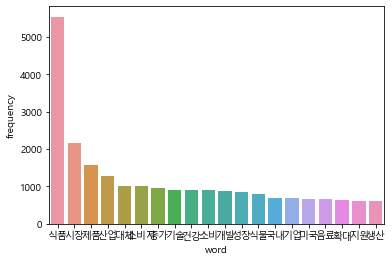

In [59]:
import seaborn as sns
ax = sns.barplot(x='word', y='frequency', data=df_word2[:20])

In [60]:
temp = df1['content_nouns']
temp

0      ['집', '해외', '맛집', '밀', '키트', '세계', '요리', '진에어'...
1      ['글로벌', '낙농', '메가', '트렌드', '우유', '대체', '식품', '...
2      ['풀무원', '식물', '식품', '선도', '기업', '선언', '세계', '시...
3      ['신', '식품', '등장', '식품', '시장', '변화', '배양육', '하상...
4      ['메', '디', '푸드', '등', '맞춤', '특수', '식품', '세계', ...
                             ...                        
429    ['가지', '대체', '식품', '농', '식품', '부', '원', '융자', ...
430    ['오늘', '내일', '행사', '11월', '일', '제주', '양', '돈',...
431    ['오늘', '내일', '행사', '11월', '일', '한국오리협회', '일', ...
432    ['체육', '현황', '미래', '심포지엄', '11월 5일', '축산', '관련...
433    ['식품', '원료', '발견', '식물', '단백', '공주', '연기', '축협...
Name: content_nouns, Length: 434, dtype: object

In [61]:
temp_list=[]
for t in temp:
    temp = t.replace('[','').replace(']', '').replace("'", '')
    temp = temp.split(", ")
    temp_list.append(temp)

In [62]:
type(temp_list[0])

list

In [63]:
import random
sample_list = random.sample(temp_list, 30)

In [64]:
type(sample_list[0])

list

In [65]:
list1 = df_word2.loc[5:14, 'word']
list1 = list1.reset_index()
list1 = list1['word']

In [66]:
df_word2[5:15]

,word,frequency
5,소비자,999
6,증가,958
7,기술,914
8,건강,908
9,소비,894
10,개발,888
11,성장,860
12,식물,789
13,국내,690
14,기업,685


In [67]:
total_list=[]
for temp in temp_list:
    t = [ word for word in list1 if word in temp ]
    if len(t)>0:
        total_list.append(t)

In [68]:
len(total_list)

388

In [69]:
from apyori import apriori
rules = apriori(total_list, min_support=0.3, min_confidence=0.2)
result = list(rules)
len(result)

42

In [70]:
import pandas as pd
result_df = pd.DataFrame(None,
                        columns = ['lhs', 'rhs', 'support', 'confidence', 'lift'])
index = 0
for row in result:
    support = row[1]
    ordered_st = row[2]
    for item in ordered_st:
        lhs = ', '.join(x for x in item[0])
        rhs = ', '.join(x for x in item[1])
        confidence = item[2]
        lift = item[3]
        result_df.loc[index] = [lhs, rhs, support, confidence, lift]
        index += 1

In [71]:
result_df

,lhs,rhs,support,confidence,lift
0,,개발,0.548969,0.548969,1.000000
1,,건강,0.541237,0.541237,1.000000
2,,국내,0.494845,0.494845,1.000000
3,,기술,0.432990,0.432990,1.000000
4,,기업,0.448454,0.448454,1.000000
...,...,...,...,...,...
121,소비자,"증가, 소비",0.337629,0.577093,1.348867
122,증가,"소비자, 소비",0.337629,0.557447,1.377639
123,"소비자, 소비",증가,0.337629,0.834395,1.377639
124,"증가, 소비",소비자,0.337629,0.789157,1.348867


In [72]:
result_df[result_df['lift']!=1]

,lhs,rhs,support,confidence,lift
11,개발,건강,0.363402,0.661972,1.223072
12,건강,개발,0.363402,0.671429,1.223072
14,개발,국내,0.335052,0.610329,1.233372
15,국내,개발,0.335052,0.677083,1.233372
17,개발,기술,0.350515,0.638498,1.474626
...,...,...,...,...,...
121,소비자,"증가, 소비",0.337629,0.577093,1.348867
122,증가,"소비자, 소비",0.337629,0.557447,1.377639
123,"소비자, 소비",증가,0.337629,0.834395,1.377639
124,"증가, 소비",소비자,0.337629,0.789157,1.348867


In [73]:
result_df[result_df['lift']!=1].sort_values(by='lift', ascending=False).head(10)

,lhs,rhs,support,confidence,lift
99,건강,"소비자, 성장",0.306701,0.566667,1.548357
104,"소비자, 성장",건강,0.306701,0.838028,1.548357
108,소비자,"건강, 소비",0.309278,0.528634,1.486305
109,"건강, 소비",소비자,0.309278,0.869565,1.486305
17,개발,기술,0.350515,0.638498,1.474626
18,기술,개발,0.350515,0.809524,1.474626
114,소비자,"건강, 증가",0.332474,0.568282,1.469956
117,"건강, 증가",소비자,0.332474,0.860000,1.469956
93,건강,"소비자, 개발",0.306701,0.566667,1.465778
96,"소비자, 개발",건강,0.306701,0.793333,1.465778


In [74]:
result_df[result_df['lift']!=1].sort_values(by=['support', 'confidence'], ascending=False).head(10)

,lhs,rhs,support,confidence,lift
86,소비,증가,0.427835,0.772093,1.274775
87,증가,소비,0.427835,0.706383,1.274775
47,건강,소비자,0.422680,0.780952,1.334844
48,소비자,건강,0.422680,0.722467,1.334844
89,소비자,증가,0.420103,0.718062,1.185566
90,증가,소비자,0.420103,0.693617,1.185566
83,소비,소비자,0.404639,0.730233,1.248151
84,소비자,소비,0.404639,0.691630,1.248151
50,건강,증가,0.386598,0.714286,1.179331
29,개발,소비자,0.386598,0.704225,1.203698


In [75]:
a = result_df[result_df['lift']>1.2].sort_values(by=['lift', 'support', 'confidence'], ascending=False).head(10)
a

,lhs,rhs,support,confidence,lift
99,건강,"소비자, 성장",0.306701,0.566667,1.548357
104,"소비자, 성장",건강,0.306701,0.838028,1.548357
108,소비자,"건강, 소비",0.309278,0.528634,1.486305
109,"건강, 소비",소비자,0.309278,0.869565,1.486305
18,기술,개발,0.350515,0.809524,1.474626
17,개발,기술,0.350515,0.638498,1.474626
114,소비자,"건강, 증가",0.332474,0.568282,1.469956
117,"건강, 증가",소비자,0.332474,0.860000,1.469956
93,건강,"소비자, 개발",0.306701,0.566667,1.465778
96,"소비자, 개발",건강,0.306701,0.793333,1.465778


In [76]:
df_word2.head(20)[['word']]

,word
0,식품
1,시장
2,제품
3,산업
4,대체
5,소비자
6,증가
7,기술
8,건강
9,소비


In [77]:
df_word[df_word['word']=='환경']

,word,frequency
62,환경,347


# 03. 워드 클라우드

In [78]:
from wordcloud import STOPWORDS
불용어 = set(['기사', '금지', '체육', '기자', '업체', '배포', '무단', '저작권', '전재', '이번', '신문','사용',
          '식품', '음료', '우리나라', '한국', '제품', '최근', '국내', '판매', '산업', '올해', '소비자', 
          '기업', '시장', '경우', '대표', '대체', '사업', '정부', '외식', '관련', '기존'])
wordcloud = WordCloud(background_color='white',
                max_words=300,
                 font_path='c:/Windows/Fonts/H2PORM.TTF',
                 relative_scaling=0.2,
                 stopwords=불용어) #워드 클라우드에서 불용어 제외시키기

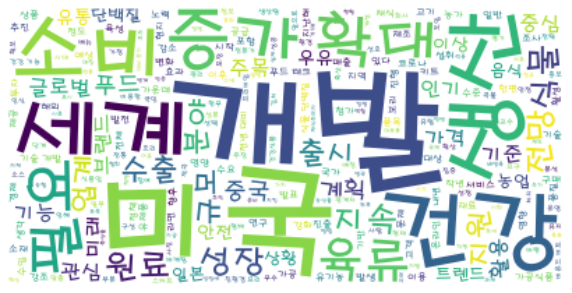

In [79]:
#워드 클라우드 그리기
temp1 = ' '.join(df_list)
wordcloud.generate(temp1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
wordcloud.to_file('data/wordcloud_대체식품0.jpg')

In [80]:
df_list[:10]

['해외', '맛집', '키트', '세계', '요리', '진에어', '기내식', '세트', '여행', '갈증']

In [81]:
temp = df1['content_nouns']

In [82]:
temp_list=[]
for t in temp:
    temp = t.replace('[','').replace(']', '').replace("'", '')
    temp = temp.split(", ")
    temp_list.append(temp)

In [83]:
len(temp_list)

434

# 04. 워드 임베딩

In [84]:
from gensim.models import Word2Vec
model = Word2Vec(temp_list, size=500, window=5, min_count=2, workers=-1)

In [85]:
model.wv.most_similar('식품')

[('상임', 0.16849184036254883),
 ('노화', 0.14590273797512054),
 ('죽', 0.141311377286911),
 ('흐름', 0.1413102149963379),
 ('상추', 0.13942360877990723),
 ('할인', 0.1381291002035141),
 ('절반', 0.13807199895381927),
 ('독소', 0.13729022443294525),
 ('사냥', 0.13506481051445007),
 ('임파서블 푸즈', 0.13293446600437164)]

In [86]:
model.wv.most_similar('대체')

[('수상자', 0.14070236682891846),
 ('채식', 0.1398281753063202),
 ('팜유', 0.1383865475654602),
 ('나흘', 0.13811978697776794),
 ('입자', 0.1375051587820053),
 ('피탈', 0.13577187061309814),
 ('영양학', 0.13485920429229736),
 ('시엔', 0.13283877074718475),
 ('육개장', 0.13251152634620667),
 ('각계', 0.1310994029045105)]

In [87]:
model.wv.most_similar('환경')

[('개선', 0.20269601047039032),
 ('생육', 0.17282932996749878),
 ('데일리', 0.1706729382276535),
 ('서정학', 0.15602385997772217),
 ('매니저', 0.1513722836971283),
 ('그로서리 스토어', 0.1485631763935089),
 ('픽업', 0.14380039274692535),
 ('체중', 0.14159256219863892),
 ('아미', 0.14011500775814056),
 ('연고', 0.13044056296348572)]

In [88]:
model.wv.most_similar('건강')

[('통지', 0.16983535885810852),
 ('브라운', 0.15787437558174133),
 ('커스', 0.15744638442993164),
 ('펄프', 0.15270887315273285),
 ('만족도', 0.14417725801467896),
 ('시작', 0.14408285915851593),
 ('물리', 0.14126157760620117),
 ('예산안', 0.13867157697677612),
 ('과학', 0.13794682919979095),
 ('열정', 0.13779734075069427)]